# What Markers to Include?

In this notebook, I'll try to identify what markers that make sense to include in our analysis. 
On all models (subset of the labelled data), we perform:
- We identify the the CA dimension that best separates high and low labeled markers (via CORG functionality 1, logistic regression)
- We identify the direction across all dims that best separates high and low labelled markers. (CORG functionality 2, multivariate logistic regression) 
- The CORG methodology might be problematic since we don't have a good span of data variables in high and low categories

In [30]:
# Standard library imports
import sys

# Third party imports
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns
import prince
from networkx.algorithms import bipartite
from netgraph import Graph
import community as community_louvain
import importlib

# Local application imports
sys.path.insert(0, '../Utility files')
from corg import DiscoverDimension, BenchmarkDimension
import corg_pipeline
from corg_pipeline import *
import graphfunk
from graphfunk import *

## CORG for assessing models

Link to Pedro's GitHub with the tutorial https://github.com/pedroramaciotti/CORG/blob/main/tutorial/CORG_quickstart.ipynb

### 1) Best CA dimensions

In [149]:
import importlib
importlib.reload(corg_pipeline)

<module 'corg_pipeline' from '/home/livtollanes/10.jan-thesis/Code/Brand Validation/../Utility files/corg_pipeline.py'>

Constructed file path: /home/livtollanes/NewData/coordinates/m8_coords/m8_column_coordinates.csv
Outputs for CORG functionality 1. Model number 8
            twitter_name  label         0         1         2         3
1164204  FortuneMagazine    1.0  0.150220 -0.369730  0.188437 -0.296993
743956         GQ_France    1.0  1.193953 -0.160987 -0.420749 -0.551254
1012421       HarvardBiz    1.0 -0.218905 -0.368146 -0.126465 -0.454144
1082291       InvestirFr    1.0 -0.142483 -0.218973  0.543056 -0.325566
668759      Madamefigaro    1.0  1.560257 -0.579953 -0.256673 -0.687124
label
1.0    7
0.0    2
Name: count, dtype: int64


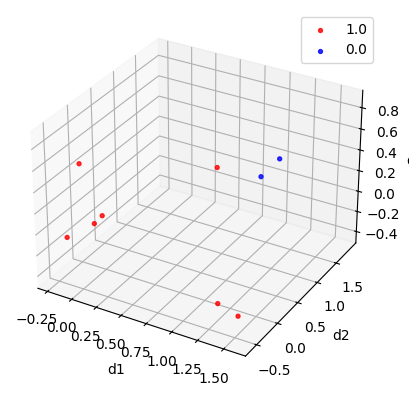

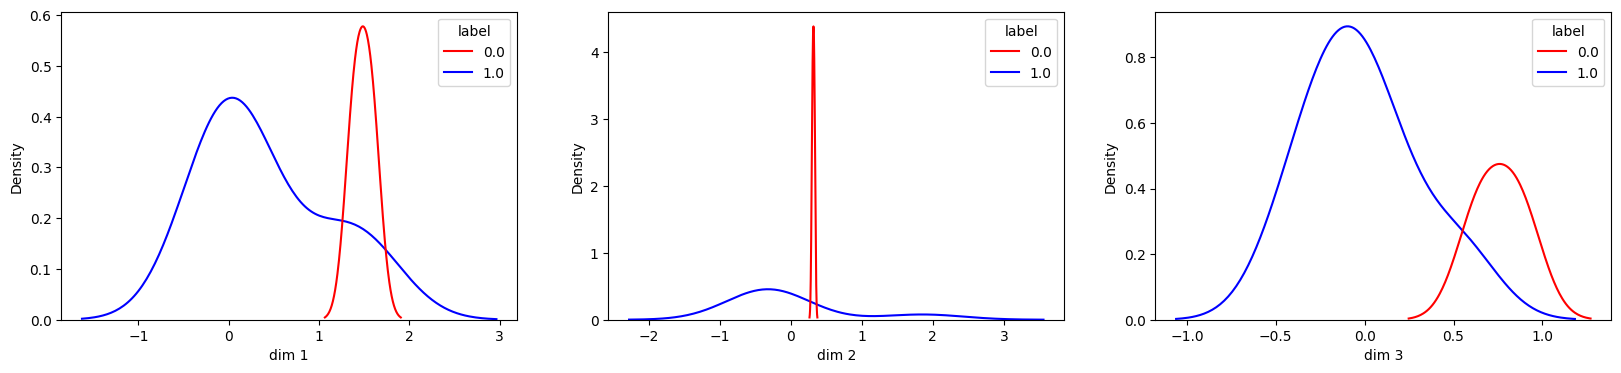

Dimension 0: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 1: Precision=0.778, Recall=1.000, F1-score=0.875
Dimension 2: Precision=0.778, Recall=1.000, F1-score=0.875


In [146]:
#CORG func 1 for model n. Input model number in order to run
m = CorgPipeline(8)
m.func1()

### 2) Spatial dimension across n CA dims

Constructed file path: /home/livtollanes/NewData/coordinates/m9_coords/m9_column_coordinates.csv
Outputs for CORG functionality 2. Model number 9
Decision boundary:
[-0.7508076994690055, 0.06209788662931594, -0.14155783658882515, 4.490981007731968]
Hyperplane Unit Normal:
[-0.9794567154716123, 0.08100901484986593, -0.18466749045410075]
Functionality 2 metrics for model number 9
Precision=1.000, Recall=1.000, F1-score=1.000, 


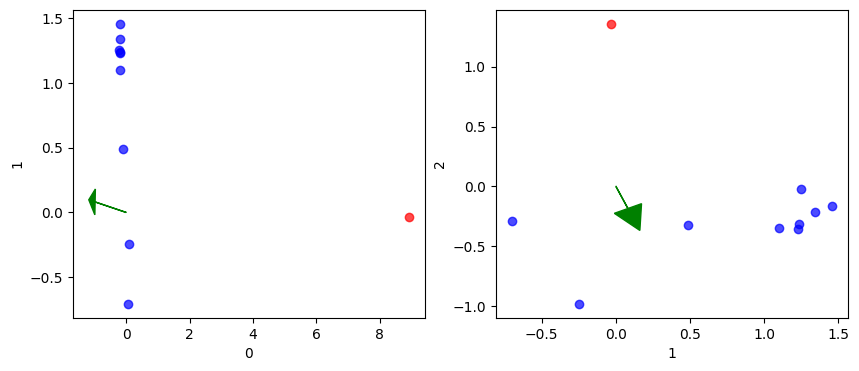

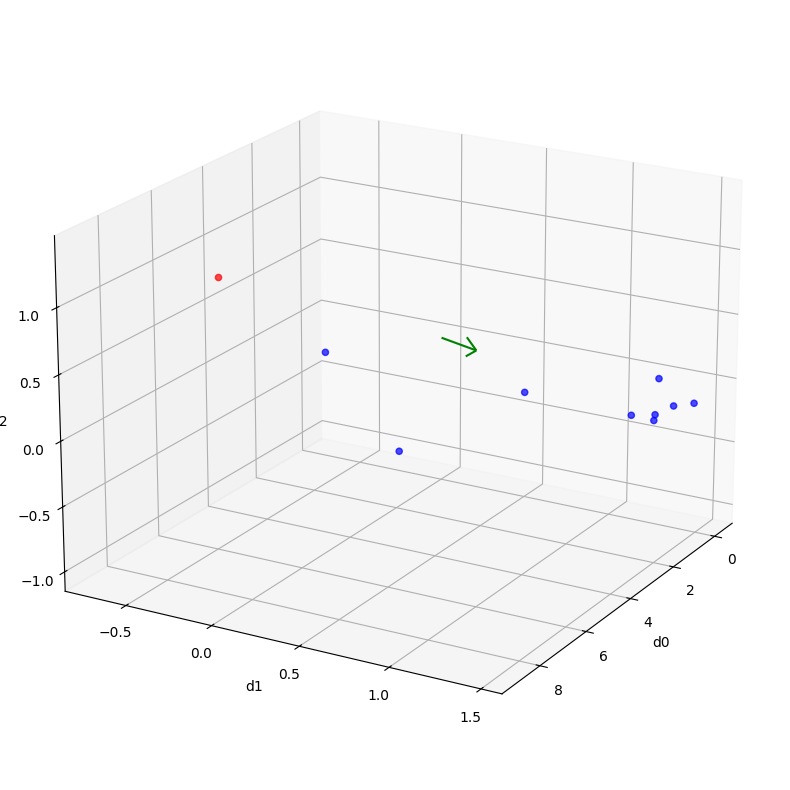

In [164]:
#CORG functionality 2 for model n. Input model number in order to run
importlib.reload(corg_pipeline)

m = CorgPipeline(9)
m.func2()

In [ ]:
m.decision_hy

Precision:
- Out of all the positive predictions we made, how many were true?

Recall:
- Out of all the data points that should be predicted as true, how many did we correctly predict as true?

F1:
- A combination of the two. how well does our model balance the trade off?

## Full projection m1

In [44]:
#Load m1 data for markers

path = '/home/livtollanes/NewData/coordinates/m1_coords'
file = '/m1_column_coordinates.csv'
marker_1 = pd.read_csv(path+file, index_col=0)

#drop dim 4
marker_1 = marker_1.drop(columns=['3'])


In [45]:
#Load the full edgelist with type labels to plot 
#Load m1 data for markers

path = '/home/livtollanes/NewData/french/'
file = '/french_edgelist_marker_threshold.csv'
edgelist_types = pd.read_csv(path+file)



In [47]:
marker_1.head()

,twitter_name,label,0,1,2
1182859,24heuresactu,NaN,-0.293833,-0.579386,-0.119284
1089907,ACAjaccio,NaN,1.831614,0.901564,-1.657251
1019152,AJA,NaN,1.761917,0.843706,-1.487659
1157208,ASICSFrance,NaN,0.970604,0.263450,0.363245
776032,AS_Monaco,NaN,1.552295,0.641992,-1.090563


Constructed file path: /home/livtollanes/NewData/coordinates/m1_coords/m1_column_coordinates.csv
Outputs for CORG functionality 2. Model number 1
Decision boundary:
[-1.6439646619135526, 0.07274045553561449, 0.35077352112187704, 0.36884180107642184]
Hyperplane Unit Normal (new found direction):
[-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]
Functionality 2 metrics for model number 1
Precision=0.870, Recall=0.909, F1-score=0.889, 


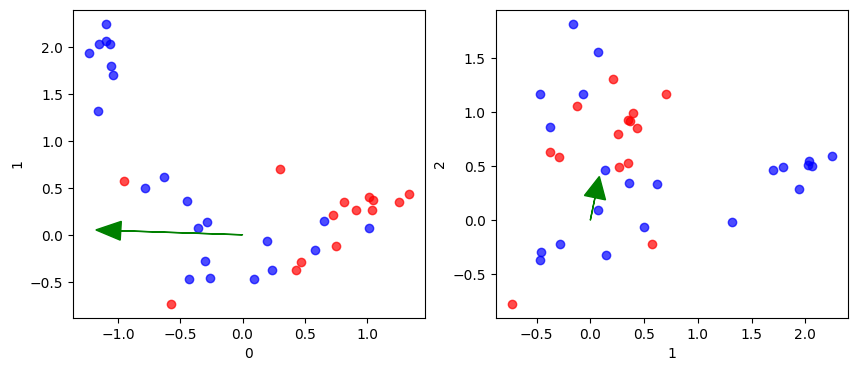

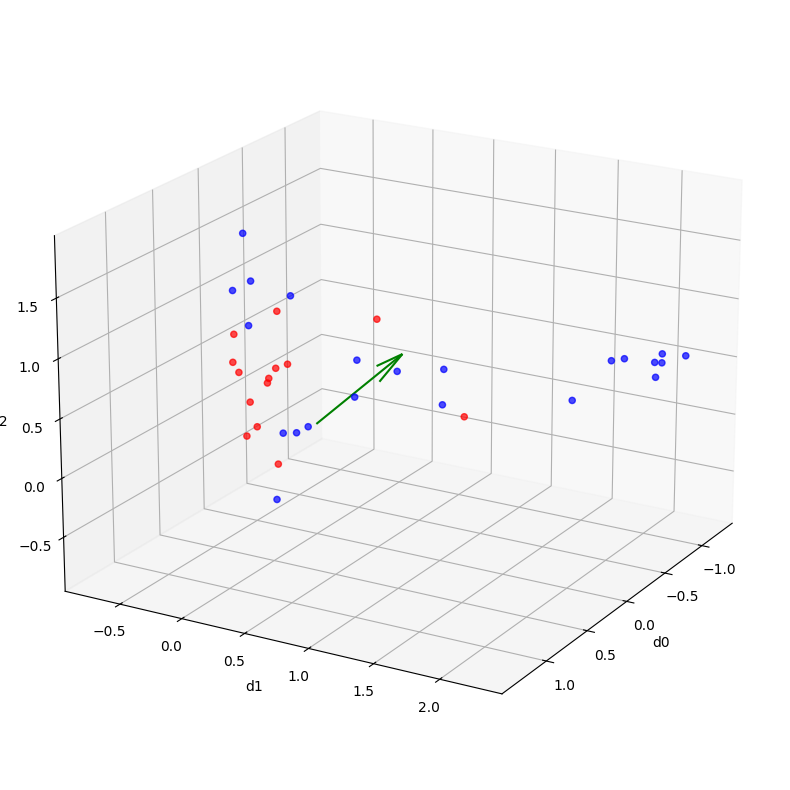

In [48]:
#CORG functionality 2 for model 1- to load the coordinates of the hyperplane unit normal (new direction vector)
importlib.reload(corg_pipeline)

m1 = CorgPipeline(1)
m1.func2()

In [49]:
import numpy as np


# Coordinates for the hyperplane unit normal
unit_normal = m1.discover_model.decision_hyperplane_unit_normal # [-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]

#Make it into an array
unit_normal = np.array(unit_normal)

# Select the columns corresponding to the dimensions
marker_coordinates = marker_1[['0', '1', '2']].values

# Perform the dot product operation
projections = np.dot(marker_coordinates, unit_normal)

# Add the projections to your DataFrame
marker_1['projection'] = projections

In [50]:
marker_1.head()

,twitter_name,label,0,1,2,projection
1182859,24heuresactu,NaN,-0.293833,-0.579386,-0.119284,0.237179
1089907,ACAjaccio,NaN,1.831614,0.901564,-1.657251,-2.096141
1019152,AJA,NaN,1.761917,0.843706,-1.487659,-1.995187
1157208,ASICSFrance,NaN,0.970604,0.263450,0.363245,-0.861231
776032,AS_Monaco,NaN,1.552295,0.641992,-1.090563,-1.716306


In [56]:
# Add the type and type2 columns to the coordinate file

edgelist_types_reduced = edgelist_types.groupby('twitter_name').first().reset_index()

marker_1 = marker_1.merge(edgelist_types_reduced[['twitter_name', 'type', 'type2']], on='twitter_name', how='left')

In [57]:
marker_1.head()

,twitter_name,label,0,1,2,projection,type,type2
0,24heuresactu,NaN,-0.293833,-0.579386,-0.119284,0.237179,media,information
1,ACAjaccio,NaN,1.831614,0.901564,-1.657251,-2.096141,clubs de football,football clubs
2,AJA,NaN,1.761917,0.843706,-1.487659,-1.995187,clubs de football,football clubs
3,ASICSFrance,NaN,0.970604,0.263450,0.363245,-0.861231,sport,consumption
4,AS_Monaco,NaN,1.552295,0.641992,-1.090563,-1.716306,clubs de football,football clubs


In [102]:
import adjustText

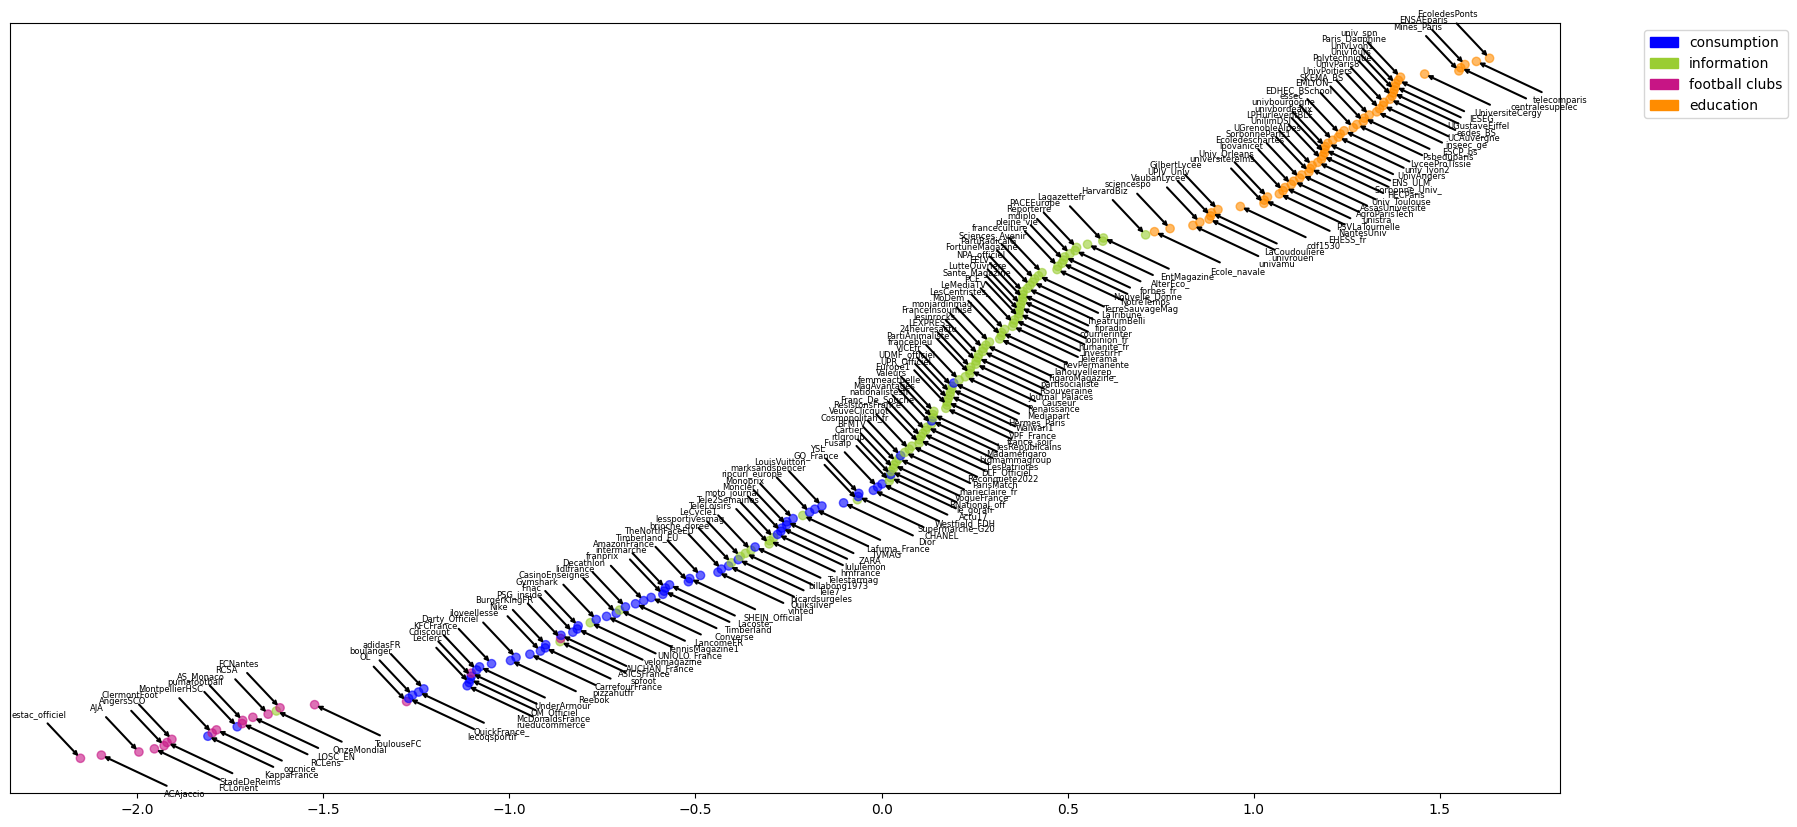

In [132]:
def plot_brands(df, dimension, fontsize= 6):
    # Manually specify a color palette
    color_dict = {'consumption': 'blue', 'information': 'yellowgreen', 'football clubs': 'mediumvioletred', 'education': 'darkorange'}

    # Sort df by the specified dimension values
    df_sorted = df.sort_values(by=dimension)

    # Map 'type2' to colors
    df_sorted['color'] = df_sorted['type2'].map(color_dict)

    # Create a scatter plot
    plt.figure(figsize=(20, 10))

    # Assign each unique twitter_name a unique y-value based on sorted order
    y_values = np.linspace(0, 1, len(df_sorted))

    scatter = plt.scatter(df_sorted[dimension], y_values, c=df_sorted['color'], alpha = 0.6)

    # For each point, add a text label with an arrow
    for i in range(len(df_sorted)):
        twitter_name = df_sorted['twitter_name'].iloc[i]
        xytext = (-30,30) if i % 2 == 0 else (60,-30)  # Alternate label position based on index
        plt.annotate(twitter_name, 
                     (df_sorted[dimension].iloc[i], y_values[i]), 
                     textcoords="offset points", 
                     xytext=xytext, 
                     ha='center', 
                     fontsize=fontsize,  # Set font size here
                     arrowprops=dict(arrowstyle='->', lw=1.5))

    legend_elements = [Patch(facecolor=color, edgecolor=color, label=type2) for type2, color in color_dict.items()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.yticks([])

    plt.show()

plot_brands(marker_1, 'projection')

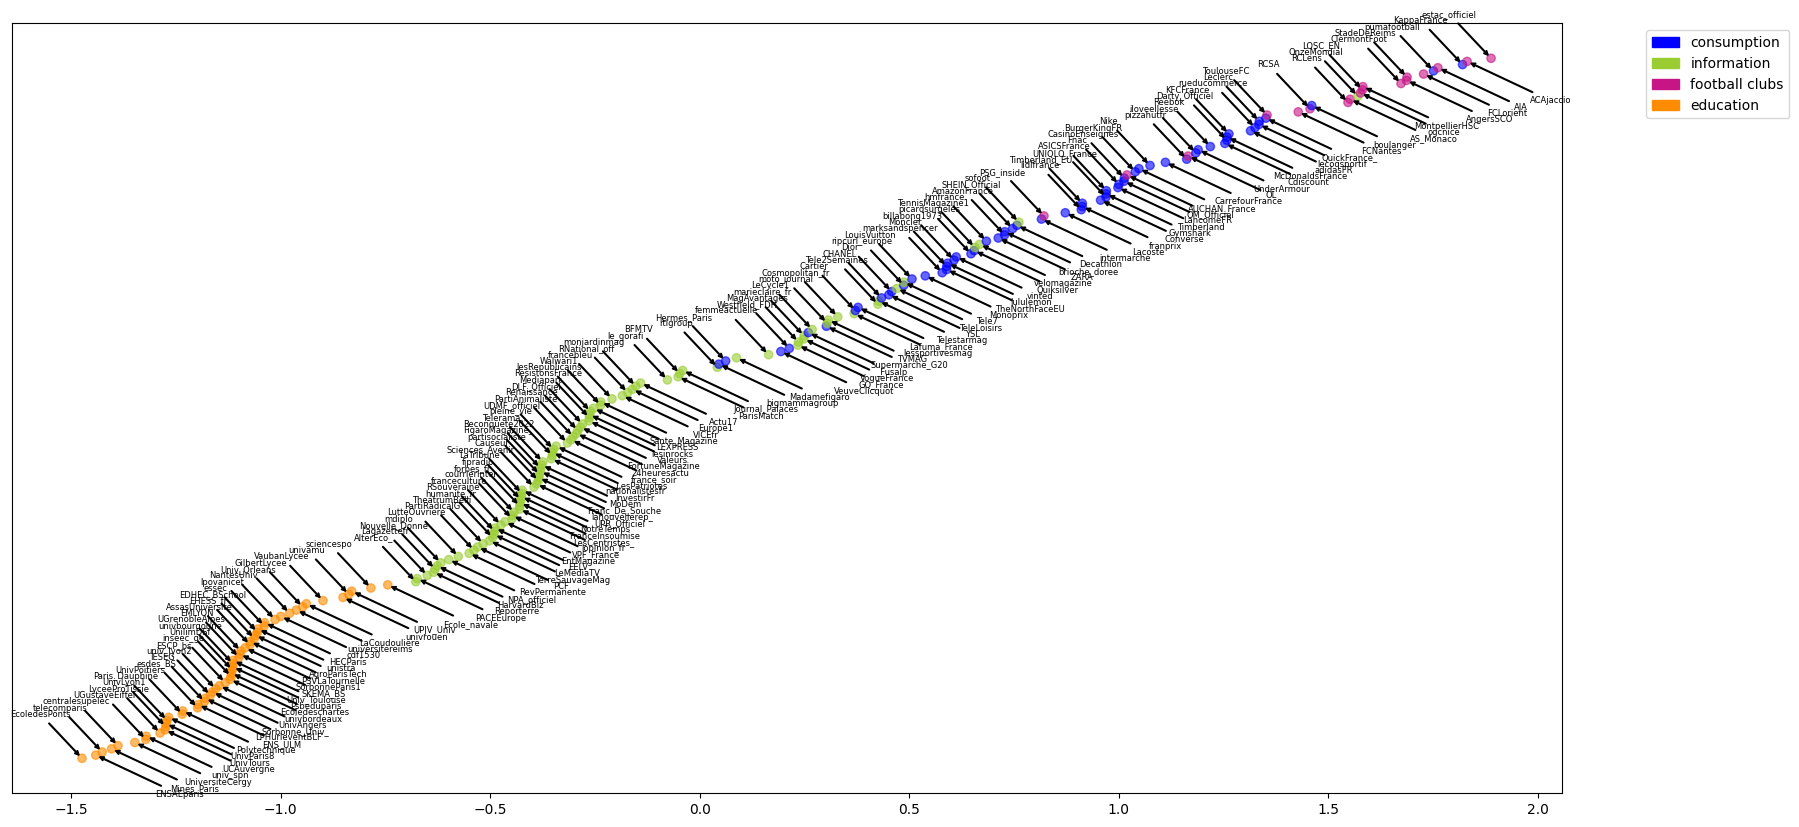

In [133]:
plot_brands(marker_1, '0')

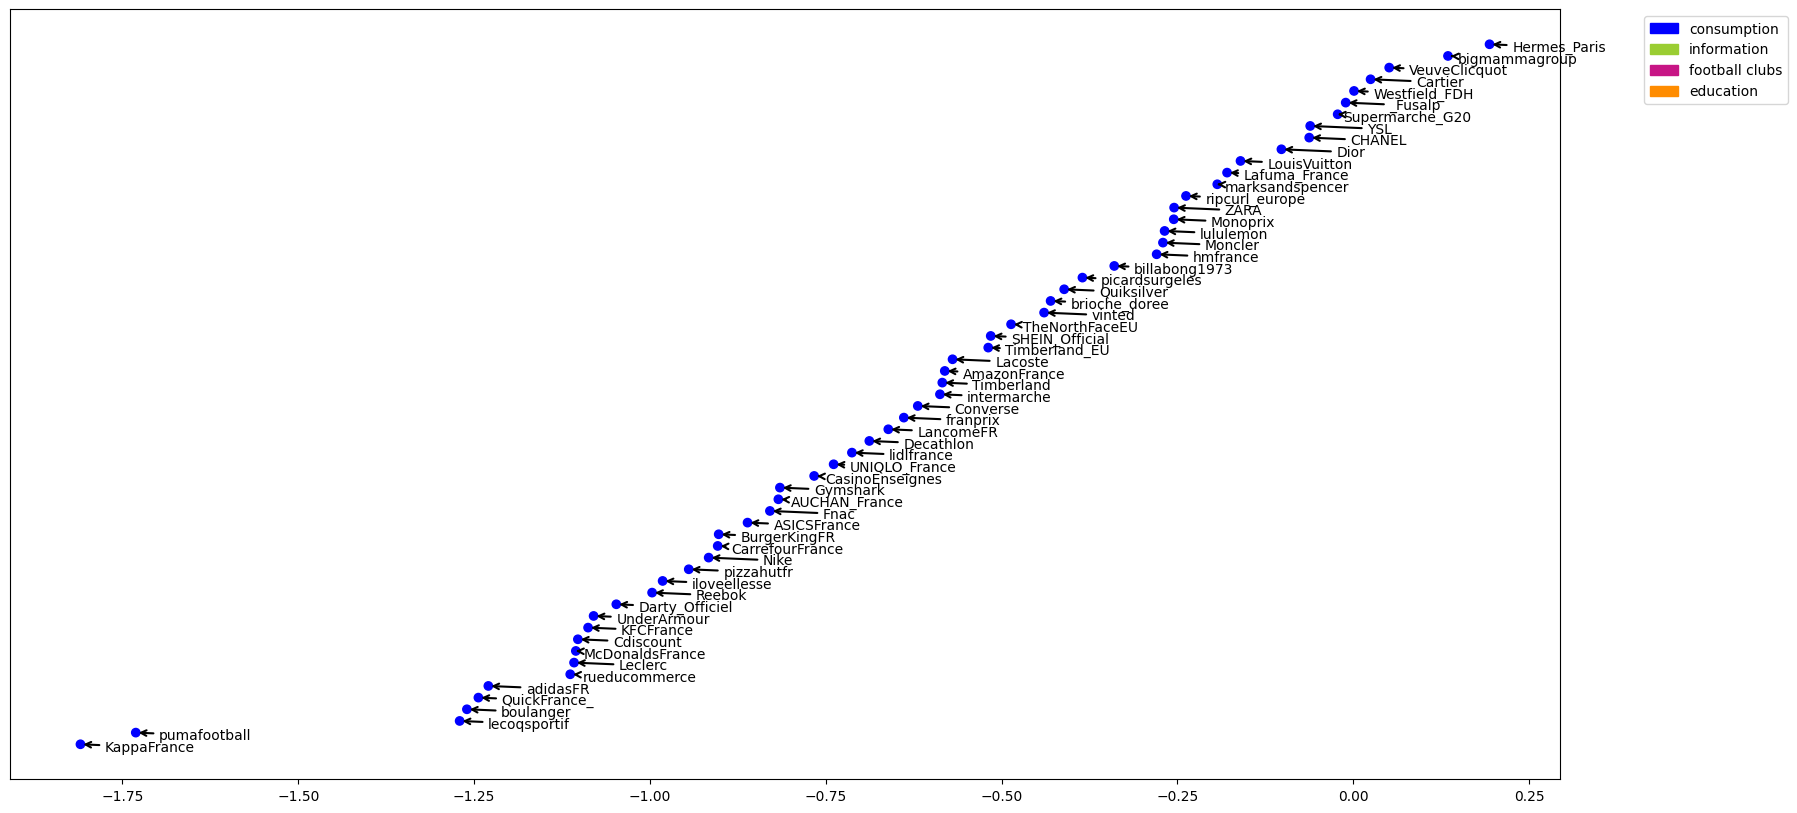

In [129]:
def plot_brands_2(df, dimension, type_to_plot):
    # Manually specify a color palette
    color_dict = {'consumption': 'blue', 'information': 'yellowgreen', 'football clubs': 'mediumvioletred', 'education': 'darkorange'}

    # Sort df by the specified dimension values and filter by type_to_plot
    df_sorted = df[df['type2'] == type_to_plot].sort_values(by=dimension)

    # Map 'type2' to colors
    df_sorted['color'] = df_sorted['type2'].map(color_dict)

    # Create a scatter plot
    plt.figure(figsize=(20, 10))

    # Assign each unique twitter_name a unique y-value based on sorted order
    y_values = np.linspace(0, 1, len(df_sorted))

    scatter = plt.scatter(df_sorted[dimension], y_values, c=df_sorted['color'], alpha = 1)

    # For each point, add a text label with an arrow
    for i in range(len(df_sorted)):
        twitter_name = df_sorted['twitter_name'].iloc[i]
        plt.annotate(twitter_name, 
                     (df_sorted[dimension].iloc[i], y_values[i]), 
                     textcoords="offset points", 
                     xytext=(50,-5),  # Increase distance here
                     ha='center', 
                     arrowprops=dict(arrowstyle='->', lw=1.5))

    legend_elements = [Patch(facecolor=color, edgecolor=color, label=type2) for type2, color in color_dict.items()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.yticks([])

    plt.show()


plot_brands_2(marker_1, 'projection', 'consumption')

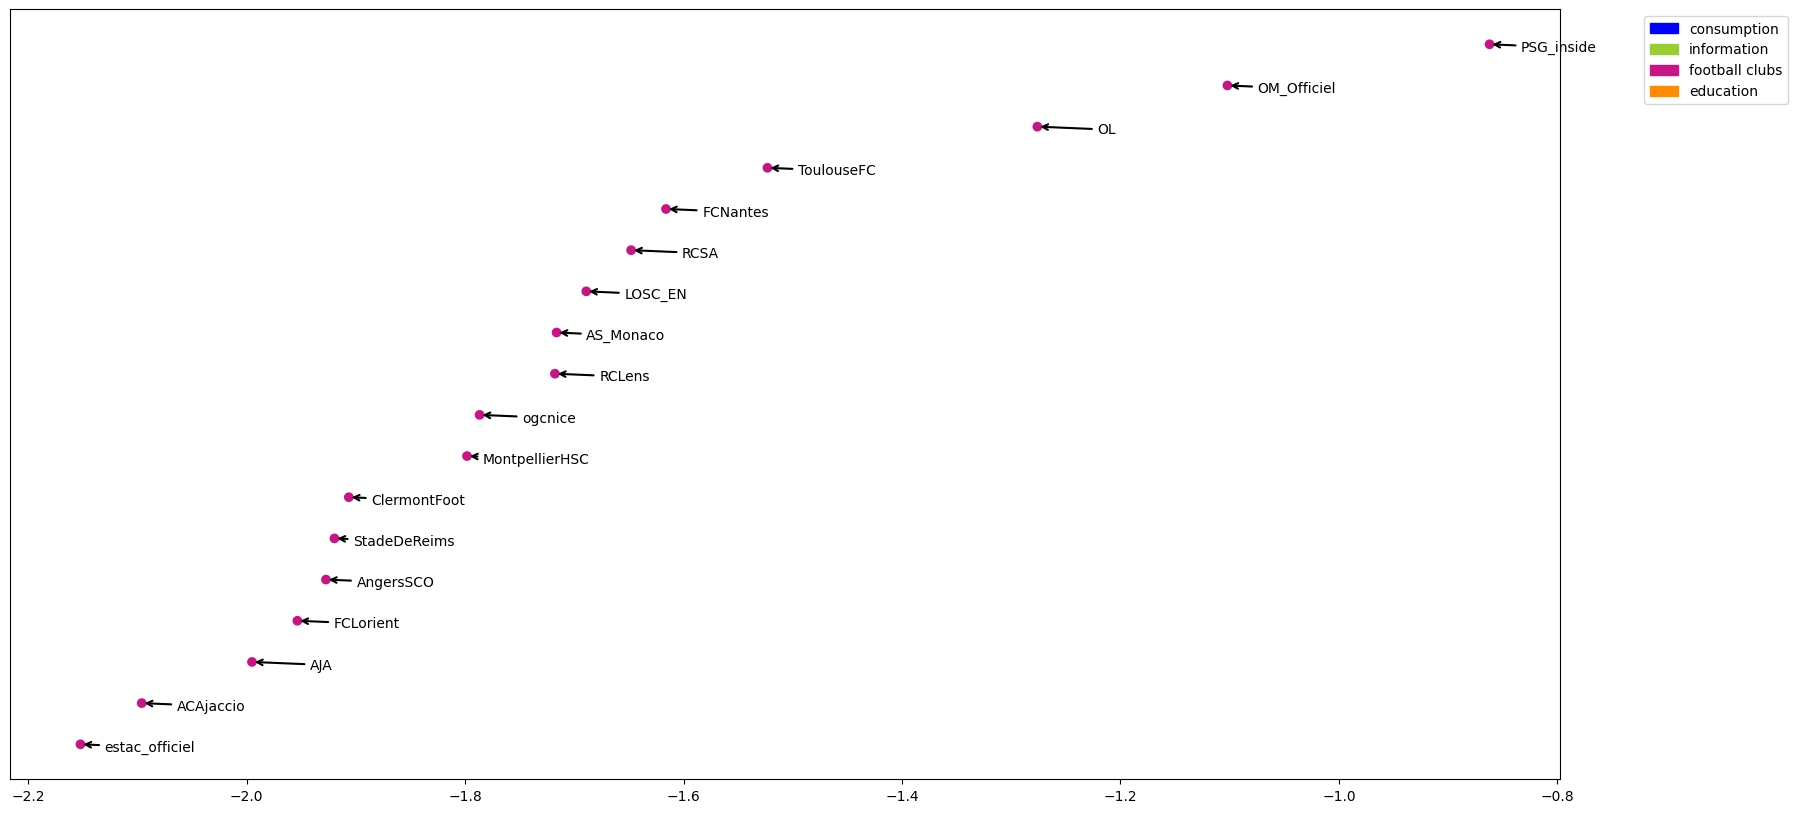

In [136]:
plot_brands_2(marker_1, 'projection', 'football clubs')

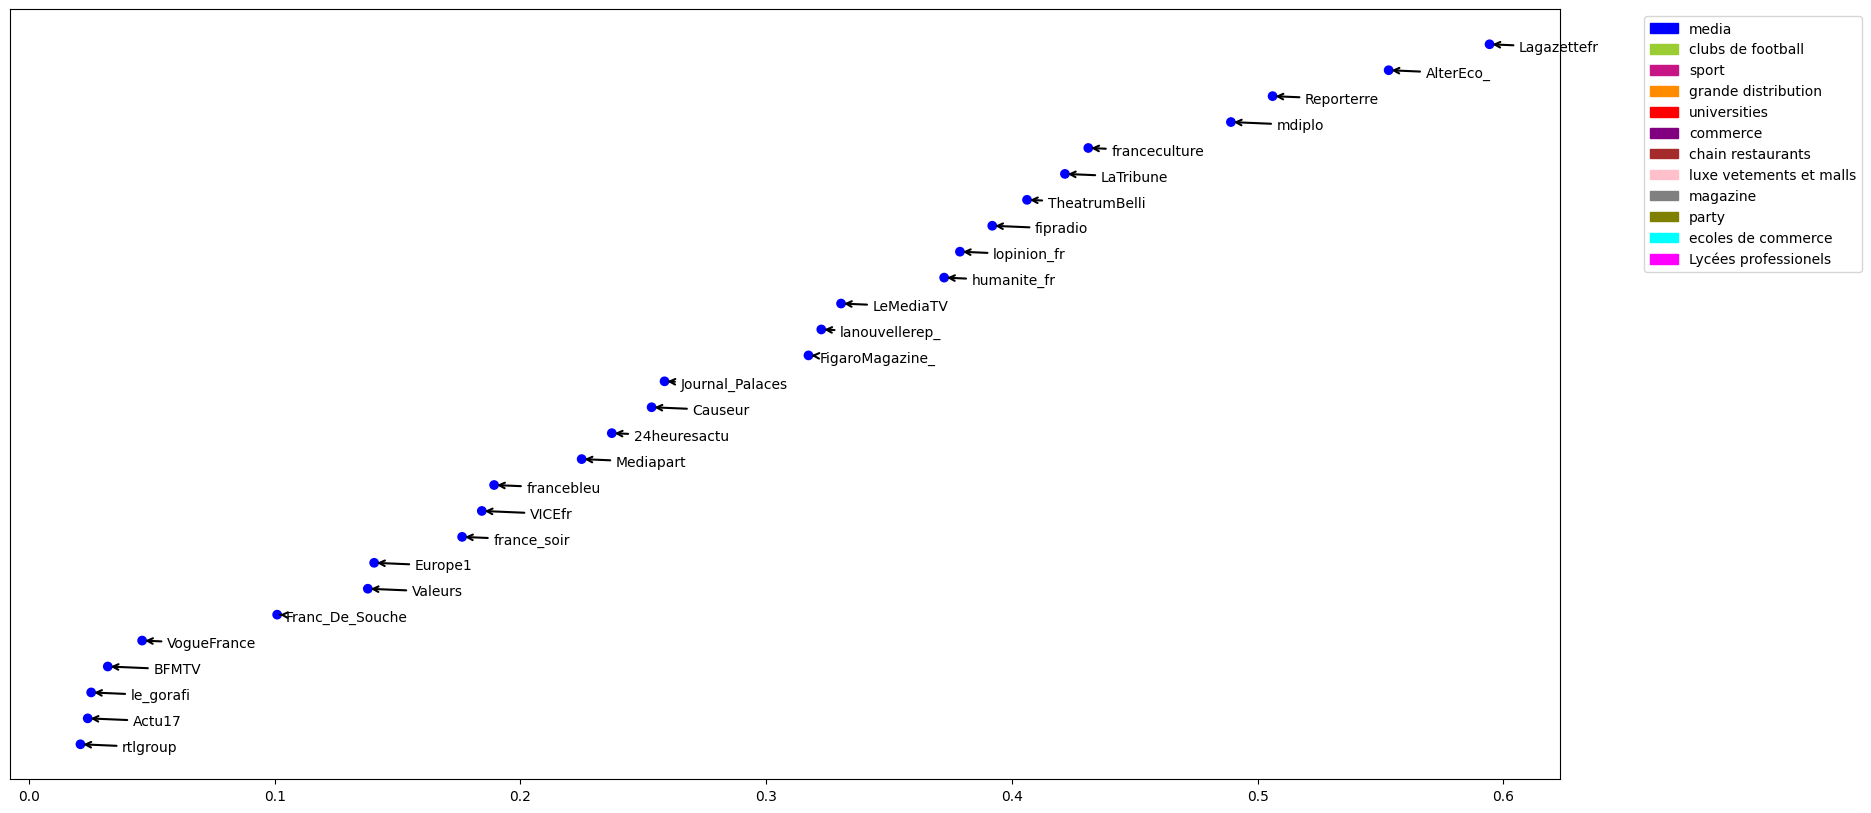

In [135]:
def plot_brands_all_types(df, dimension, type_to_plot):
    # Manually specify a color palette for 12 types
    color_dict = {'media': 'blue', 'clubs de football': 'yellowgreen', 'sport': 'mediumvioletred', 'grande distribution': 'darkorange',
                  'universities': 'red', 'commerce': 'purple', 'chain restaurants': 'brown', 'luxe vetements et malls': 'pink',
                  'magazine': 'gray', 'party': 'olive', 'ecoles de commerce': 'cyan', 'Lycées professionels': 'magenta'}

    # Sort df by the specified dimension values and filter by type_to_plot
    df_sorted = df[df['type'] == type_to_plot].sort_values(by=dimension)

    # Map 'type' to colors
    df_sorted['color'] = df_sorted['type'].map(color_dict)

    # Create a scatter plot
    plt.figure(figsize=(20, 10))

    # Assign each unique twitter_name a unique y-value based on sorted order
    y_values = np.linspace(0, 1, len(df_sorted))

    scatter = plt.scatter(df_sorted[dimension], y_values, c=df_sorted['color'], alpha = 1)

    # For each point, add a text label with an arrow
    for i in range(len(df_sorted)):
        twitter_name = df_sorted['twitter_name'].iloc[i]
        plt.annotate(twitter_name, 
                     (df_sorted[dimension].iloc[i], y_values[i]), 
                     textcoords="offset points", 
                     xytext=(50,-5),  # Increase distance here
                     ha='center', 
                     arrowprops=dict(arrowstyle='->', lw=1.5))

    legend_elements = [Patch(facecolor=color, edgecolor=color, label=type2) for type2, color in color_dict.items()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.yticks([])

    plt.show()


plot_brands_all_types(marker_1, 'projection', 'media')

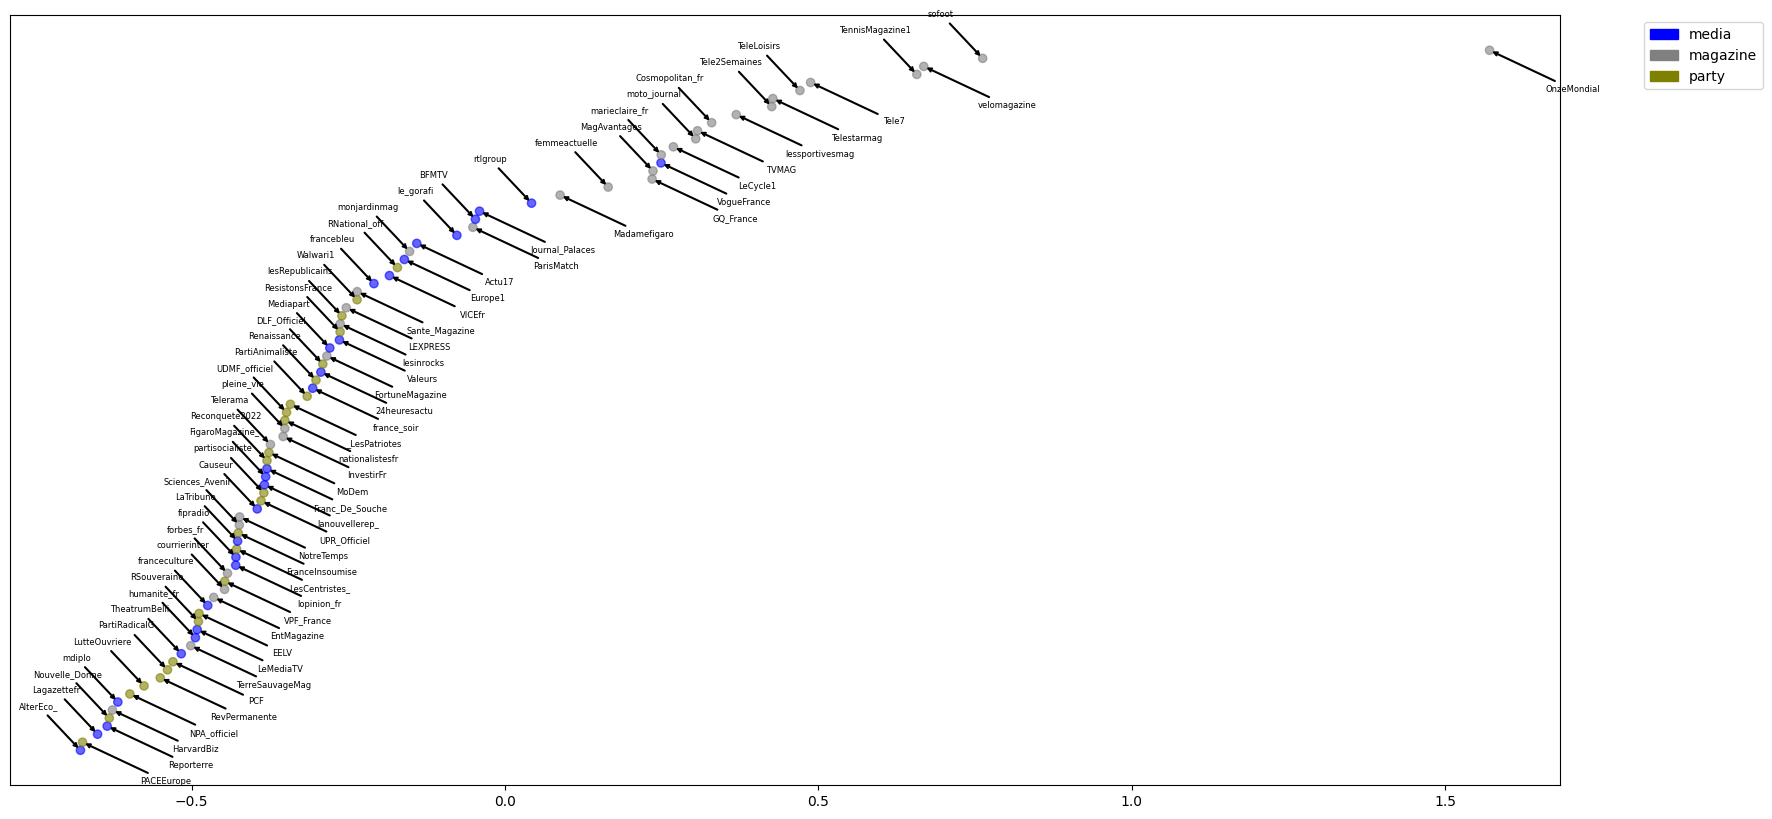

In [141]:
def plot_brands(df, dimension, types=None, fontsize=6):
    # Manually specify a color palette for 12 types
    color_dict = {'media': 'blue', 'clubs de football': 'yellowgreen', 'sport': 'mediumvioletred', 'grande distribution': 'darkorange',
                  'universities': 'red', 'commerce': 'purple', 'chain restaurants': 'brown', 'luxe vetements et malls': 'pink',
                  'magazine': 'gray', 'party': 'olive', 'ecoles de commerce': 'cyan', 'Lycées professionels': 'magenta'}

    # If types are specified, filter df by those types
    if types is not None:
        df = df[df['type'].isin(types)]

    # Sort df by the specified dimension values
    df_sorted = df.sort_values(by=dimension)

    # Map 'type' to colors
    df_sorted['color'] = df_sorted['type'].map(color_dict)

    # Create a scatter plot
    plt.figure(figsize=(20, 10))

    # Assign each unique twitter_name a unique y-value based on sorted order
    y_values = np.linspace(0, 1, len(df_sorted))

    scatter = plt.scatter(df_sorted[dimension], y_values, c=df_sorted['color'], alpha = 0.6)

    # For each point, add a text label with an arrow
    for i in range(len(df_sorted)):
        twitter_name = df_sorted['twitter_name'].iloc[i]
        xytext = (-30,30) if i % 2 == 0 else (60,-30)  # Alternate label position based on index
        plt.annotate(twitter_name, 
                     (df_sorted[dimension].iloc[i], y_values[i]), 
                     textcoords="offset points", 
                     xytext=xytext, 
                     ha='center', 
                     fontsize=fontsize,  # Set font size here
                     arrowprops=dict(arrowstyle='->', lw=1.5))

    legend_elements = [Patch(facecolor=color, edgecolor=color, label=type2) for type2, color in color_dict.items() if type2 in df_sorted['type'].unique()]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.yticks([])

    plt.show()

# Plot brands for 'media' and 'sport' types
plot_brands(marker_1, '0', types=['magazine', 'media', 'party'])


## Full projection m2 

### Markers

In [ ]:
#CORG functionality 2 for model 1- to load the coordinates of the hyperplane unit normal (new direction vector)
importlib.reload(corg_pipeline)

m1 = CorgPipeline(1)
m1.func2()

In [ ]:
# Coordinates for the hyperplane unit normal
unit_normal = m1.discover_model.decision_hyperplane_unit_normal # [-0.9770710479529808, 0.043232433619365344, 0.20847811380432935]

#Make it into an array
unit_normal = np.array(unit_normal)

# Select the columns corresponding to the dimensions
marker_coordinates = marker_1[['0', '1', '2']].values

# Perform the dot product operation
projections = np.dot(marker_coordinates, unit_normal)

# Add the projections to your DataFrame
marker_1['projection'] = projections